In [1]:
%matplotlib inline

import os
from allennlp.nn.util import move_to_device
import torch
import numpy as np

import pandas as pd
from umap import UMAP

import matplotlib.pyplot as plt
import seaborn as sns

import json

from SocialMediaIE.data.tokenization import get_match_iter, get_match_object

from SocialMediaIE.predictor.model_predictor import run, get_args, PREFIX, get_model_output, output_to_df


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [2]:
sns.set_context("talk")
sns.set_style("ticks")

np.random.seed(1337)

In [3]:
MODEL_NAME="all_multitask_stacked_l2_0_lr_1e-3_no_neel"
SERIALIZATION_DIR = os.path.realpath(f"../data/models/{MODEL_NAME}/")
args = get_args(PREFIX, SERIALIZATION_DIR)
TASKS, vocab, model, readers, test_iterator = run(args)

F:\ProgramData\Miniconda3\envs\SocialMediaIE\lib\site-packages\torch\nn\modules\rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
F:\ProgramData\Miniconda3\envs\SocialMediaIE\lib\site-packages\torch\nn\modules\rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
F:\ProgramData\Miniconda3\envs\SocialMediaIE\lib\site-packages\torch\nn\modules\rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
F:\ProgramData\Miniconda3\envs\SocialMediaIE\lib\site-packages\torch\nn\modules

In [4]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    if "elmo" not in param_tensor:
        print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
word_embeddings.token_embedder_tokens._projection.weight 	 torch.Size([100, 1024])
word_embeddings.token_embedder_tokens._projection.bias 	 torch.Size([100])
encoders.ccg._module.moduleList.0.weight_ih_l0 	 torch.Size([400, 100])
encoders.ccg._module.moduleList.0.weight_hh_l0 	 torch.Size([400, 100])
encoders.ccg._module.moduleList.0.bias_ih_l0 	 torch.Size([400])
encoders.ccg._module.moduleList.0.bias_hh_l0 	 torch.Size([400])
encoders.ccg._module.moduleList.0.weight_ih_l0_reverse 	 torch.Size([400, 100])
encoders.ccg._module.moduleList.0.weight_hh_l0_reverse 	 torch.Size([400, 100])
encoders.ccg._module.moduleList.0.bias_ih_l0_reverse 	 torch.Size([400])
encoders.ccg._module.moduleList.0.bias_hh_l0_reverse 	 torch.Size([400])
encoders.ccg._module.moduleList.1.weight_ih_l0 	 torch.Size([400, 200])
encoders.ccg._module.moduleList.1.weight_hh_l0 	 torch.Size([400, 100])
encoders.ccg._module.moduleList.1.bias_ih_l0 	 torch.Size([400])
encoders.ccg._module.moduleList.1

crftagger.multimodal_ner.encoder._module.moduleList.2.weight_hh_l0_reverse 	 torch.Size([400, 100])
crftagger.multimodal_ner.encoder._module.moduleList.2.bias_ih_l0_reverse 	 torch.Size([400])
crftagger.multimodal_ner.encoder._module.moduleList.2.bias_hh_l0_reverse 	 torch.Size([400])
crftagger.multimodal_ner.encoder._module.moduleList.3.weight_ih_l0 	 torch.Size([400, 200])
crftagger.multimodal_ner.encoder._module.moduleList.3.weight_hh_l0 	 torch.Size([400, 100])
crftagger.multimodal_ner.encoder._module.moduleList.3.bias_ih_l0 	 torch.Size([400])
crftagger.multimodal_ner.encoder._module.moduleList.3.bias_hh_l0 	 torch.Size([400])
crftagger.multimodal_ner.encoder._module.moduleList.3.weight_ih_l0_reverse 	 torch.Size([400, 200])
crftagger.multimodal_ner.encoder._module.moduleList.3.weight_hh_l0_reverse 	 torch.Size([400, 100])
crftagger.multimodal_ner.encoder._module.moduleList.3.bias_ih_l0_reverse 	 torch.Size([400])
crftagger.multimodal_ner.encoder._module.moduleList.3.bias_hh_l0_re

crftagger.wnut17_ner.crf.start_transitions 	 torch.Size([13])
crftagger.wnut17_ner.crf.end_transitions 	 torch.Size([13])
crftagger.ritter_ner.text_field_embedder.token_embedder_tokens._projection.weight 	 torch.Size([100, 1024])
crftagger.ritter_ner.text_field_embedder.token_embedder_tokens._projection.bias 	 torch.Size([100])
crftagger.ritter_ner.encoder._module.moduleList.0.weight_ih_l0 	 torch.Size([400, 100])
crftagger.ritter_ner.encoder._module.moduleList.0.weight_hh_l0 	 torch.Size([400, 100])
crftagger.ritter_ner.encoder._module.moduleList.0.bias_ih_l0 	 torch.Size([400])
crftagger.ritter_ner.encoder._module.moduleList.0.bias_hh_l0 	 torch.Size([400])
crftagger.ritter_ner.encoder._module.moduleList.0.weight_ih_l0_reverse 	 torch.Size([400, 100])
crftagger.ritter_ner.encoder._module.moduleList.0.weight_hh_l0_reverse 	 torch.Size([400, 100])
crftagger.ritter_ner.encoder._module.moduleList.0.bias_ih_l0_reverse 	 torch.Size([400])
crftagger.ritter_ner.encoder._module.moduleList.0.b

crftagger.ritter_chunk.encoder._module.moduleList.1.bias_hh_l0 	 torch.Size([400])
crftagger.ritter_chunk.encoder._module.moduleList.1.weight_ih_l0_reverse 	 torch.Size([400, 200])
crftagger.ritter_chunk.encoder._module.moduleList.1.weight_hh_l0_reverse 	 torch.Size([400, 100])
crftagger.ritter_chunk.encoder._module.moduleList.1.bias_ih_l0_reverse 	 torch.Size([400])
crftagger.ritter_chunk.encoder._module.moduleList.1.bias_hh_l0_reverse 	 torch.Size([400])
crftagger.ritter_chunk.tag_projection_layer._module.weight 	 torch.Size([18, 200])
crftagger.ritter_chunk.tag_projection_layer._module.bias 	 torch.Size([18])
crftagger.ritter_chunk.crf.transitions 	 torch.Size([18, 18])
crftagger.ritter_chunk.crf._constraint_mask 	 torch.Size([20, 20])
crftagger.ritter_chunk.crf.start_transitions 	 torch.Size([18])
crftagger.ritter_chunk.crf.end_transitions 	 torch.Size([18])
crftagger.ud_pos.text_field_embedder.token_embedder_tokens._projection.weight 	 torch.Size([100, 1024])
crftagger.ud_pos.text

In [5]:
print("Model's state_dict:")

all_weights = []
all_keys = []
all_tasks = []

for param_tensor in model.state_dict():
    if param_tensor.endswith(".tag_projection_layer._module.weight"):
        task_name = param_tensor.split(".")[1]
        all_tasks.append(task_name)
        vocab_items = [vocab.get_token_from_index(i, task_name) for i in range(vocab.get_vocab_size(task_name))]
        task_classifier_weights = model.state_dict()[param_tensor]
        all_weights.append(task_classifier_weights.cpu().numpy())
        all_keys.extend([f"{task_name}.{v}" for v in vocab_items])
        print(f"{task_name}\t{vocab_items}\t{task_classifier_weights.size()}")
all_weights = np.vstack(all_weights)
all_weights.shape, all_keys

Model's state_dict:
multimodal_ner	['O', 'B-PER', 'I-PER', 'B-LOC', 'B-ORG', 'B-MISC', 'I-MISC', 'I-LOC', 'I-ORG']	torch.Size([9, 200])
broad_ner	['O', 'B-PER', 'B-ORG', 'B-LOC', 'I-PER', 'I-ORG', 'I-LOC']	torch.Size([7, 200])
wnut17_ner	['O', 'B-PERSON', 'B-LOCATION', 'I-PERSON', 'B-GROUP', 'I-LOCATION', 'B-CORPORATION', 'I-CREATIVE-WORK', 'I-PRODUCT', 'I-GROUP', 'B-PRODUCT', 'B-CREATIVE-WORK', 'I-CORPORATION']	torch.Size([13, 200])
ritter_ner	['O', 'B-PERSON', 'I-OTHER', 'B-GEO-LOC', 'B-OTHER', 'I-PERSON', 'B-COMPANY', 'I-FACILITY', 'B-FACILITY', 'B-PRODUCT', 'I-PRODUCT', 'I-MUSICARTIST', 'B-MUSICARTIST', 'B-SPORTSTEAM', 'I-GEO-LOC', 'I-MOVIE', 'I-COMPANY', 'B-MOVIE', 'B-TVSHOW', 'I-TVSHOW', 'I-SPORTSTEAM']	torch.Size([21, 200])
yodie_ner	['O', 'B-ORGANIZATION', 'B-PERSON', 'B-LOCATION', 'I-PERSON', 'I-LOCATION', 'I-ORGANIZATION', 'B-GEO-LOC', 'I-OTHER', 'B-UNK', 'B-COMPANY', 'B-OTHER', 'I-UNK', 'B-PRODUCT', 'I-PRODUCT', 'I-GEO-LOC', 'I-FACILITY', 'B-SPORTSTEAM', 'B-MUSICARTIST', 'B-

((256, 200),
 ['multimodal_ner.O',
  'multimodal_ner.B-PER',
  'multimodal_ner.I-PER',
  'multimodal_ner.B-LOC',
  'multimodal_ner.B-ORG',
  'multimodal_ner.B-MISC',
  'multimodal_ner.I-MISC',
  'multimodal_ner.I-LOC',
  'multimodal_ner.I-ORG',
  'broad_ner.O',
  'broad_ner.B-PER',
  'broad_ner.B-ORG',
  'broad_ner.B-LOC',
  'broad_ner.I-PER',
  'broad_ner.I-ORG',
  'broad_ner.I-LOC',
  'wnut17_ner.O',
  'wnut17_ner.B-PERSON',
  'wnut17_ner.B-LOCATION',
  'wnut17_ner.I-PERSON',
  'wnut17_ner.B-GROUP',
  'wnut17_ner.I-LOCATION',
  'wnut17_ner.B-CORPORATION',
  'wnut17_ner.I-CREATIVE-WORK',
  'wnut17_ner.I-PRODUCT',
  'wnut17_ner.I-GROUP',
  'wnut17_ner.B-PRODUCT',
  'wnut17_ner.B-CREATIVE-WORK',
  'wnut17_ner.I-CORPORATION',
  'ritter_ner.O',
  'ritter_ner.B-PERSON',
  'ritter_ner.I-OTHER',
  'ritter_ner.B-GEO-LOC',
  'ritter_ner.B-OTHER',
  'ritter_ner.I-PERSON',
  'ritter_ner.B-COMPANY',
  'ritter_ner.I-FACILITY',
  'ritter_ner.B-FACILITY',
  'ritter_ner.B-PRODUCT',
  'ritter_ner.I-PR

In [6]:
X_embedded = UMAP(
    n_components=2, 
    min_dist=1,
).fit_transform(all_weights)

In [7]:
df = pd.DataFrame({"task_labels": all_keys, "d1": X_embedded[:, 0], "d2": X_embedded[:, 1]})
df = pd.concat([df, df.task_labels.str.split(".", n=1, expand=True).rename(columns={0: "task", 1: "label"})], axis=1)
df.head()

,task_labels,d1,d2,task,label
0,multimodal_ner.O,-2.772630,1.775236,multimodal_ner,O
1,multimodal_ner.B-PER,-0.866048,1.116512,multimodal_ner,B-PER
2,multimodal_ner.I-PER,-0.150528,2.639058,multimodal_ner,I-PER
3,multimodal_ner.B-LOC,0.507111,-0.570836,multimodal_ner,B-LOC
4,multimodal_ner.B-ORG,-0.235029,0.286755,multimodal_ner,B-ORG


In [8]:
df.label.unique().shape

(212,)

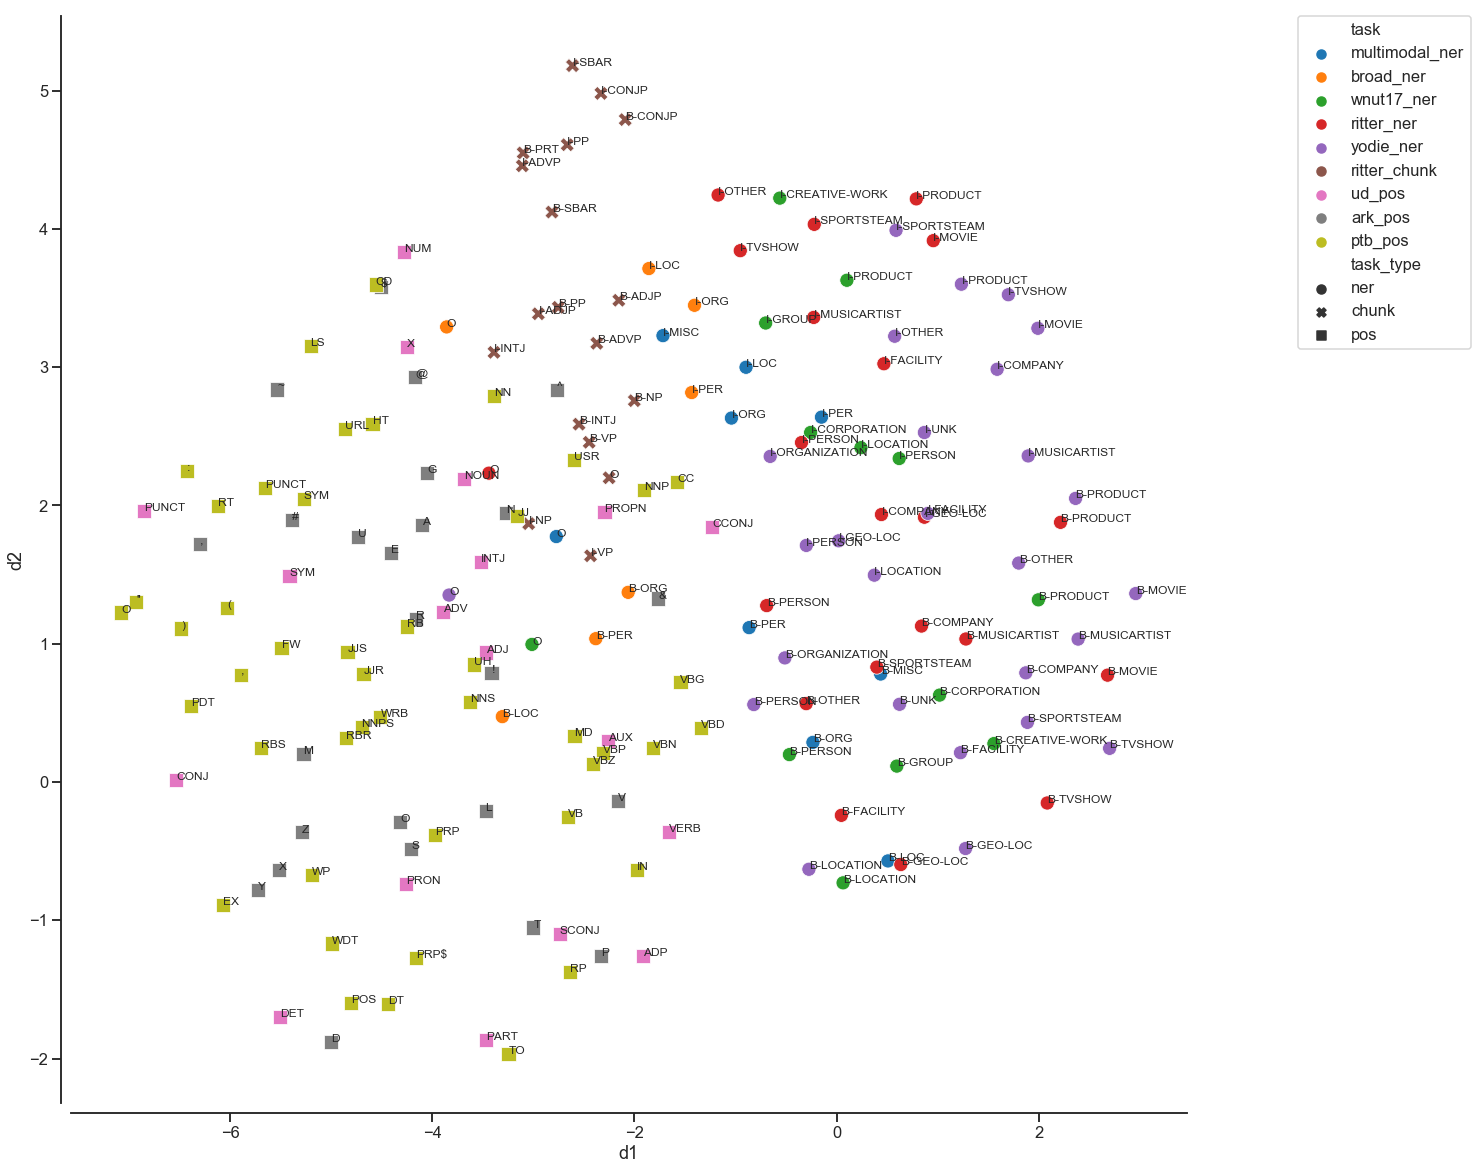

In [9]:
fig = plt.figure(figsize=(20, 20))

df_t = df[df.task != "ritter_ccg"].assign(task_type=lambda x: x.task.str.split("_", expand=True)[1])
ax = sns.scatterplot(
    x="d1", y="d2", 
    data=df_t, 
    hue="task", style="task_type", 
    s=200
)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
for i, row in df_t.iterrows():
    #ax.text(row.d1+.1, row.d2+.1, row.label, fontsize=16)
    ax.annotate(
        row.label, 
        xy=(row.d1, row.d2), xytext=(0, 0), 
        textcoords='offset points',
        fontsize=12
    )
    
sns.despine(offset=10)
plt.savefig(f"../figures/multitask_learning/tagging_{MODEL_NAME}_all.pdf", bbox_inches="tight")

F:\ProgramData\Miniconda3\envs\SocialMediaIE\lib\site-packages\umap\umap_.py:1364: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


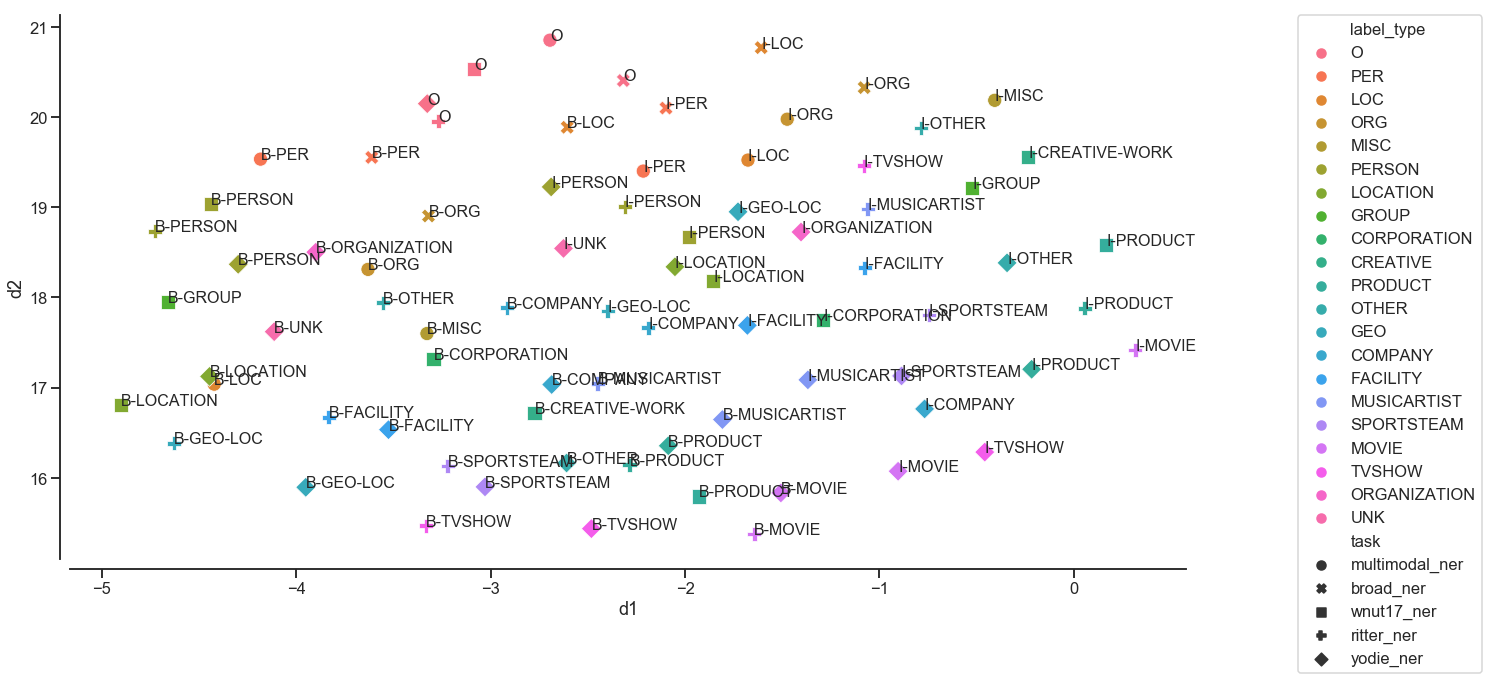

In [10]:
fig = plt.figure(figsize=(20, 10))

task = "ner"

def get_ner_label_type(label):
    if label == "O":
        return label
    label = label.split("-")[1]
    return label

df_t = df[df.task.str.endswith(task)].copy().assign(label_type=lambda x: x.label.apply(get_ner_label_type))
X_embedded = UMAP(
    n_components=2, 
    min_dist=0.5,
    n_neighbors=100
).fit_transform(all_weights[df_t.index.values, :])
df_t["d1"] = X_embedded[:, 0]
df_t["d2"] = X_embedded[:, 1]


ax = sns.scatterplot(
    x="d1", y="d2", 
    data=df_t, 
    hue="label_type", style="task", 
    s=200
)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
for i, row in df_t.iterrows():
    #ax.text(row.d1+.1, row.d2+.1, row.label, fontsize=16)
    ax.annotate(
        row.label, 
        xy=(row.d1, row.d2), xytext=(0, 0), 
        textcoords='offset points',
        fontsize=16
    )
    
sns.despine(offset=10)
plt.savefig(f"../figures/multitask_learning/tagging_{MODEL_NAME}_{task}.pdf", bbox_inches="tight")

F:\ProgramData\Miniconda3\envs\SocialMediaIE\lib\site-packages\umap\umap_.py:1364: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


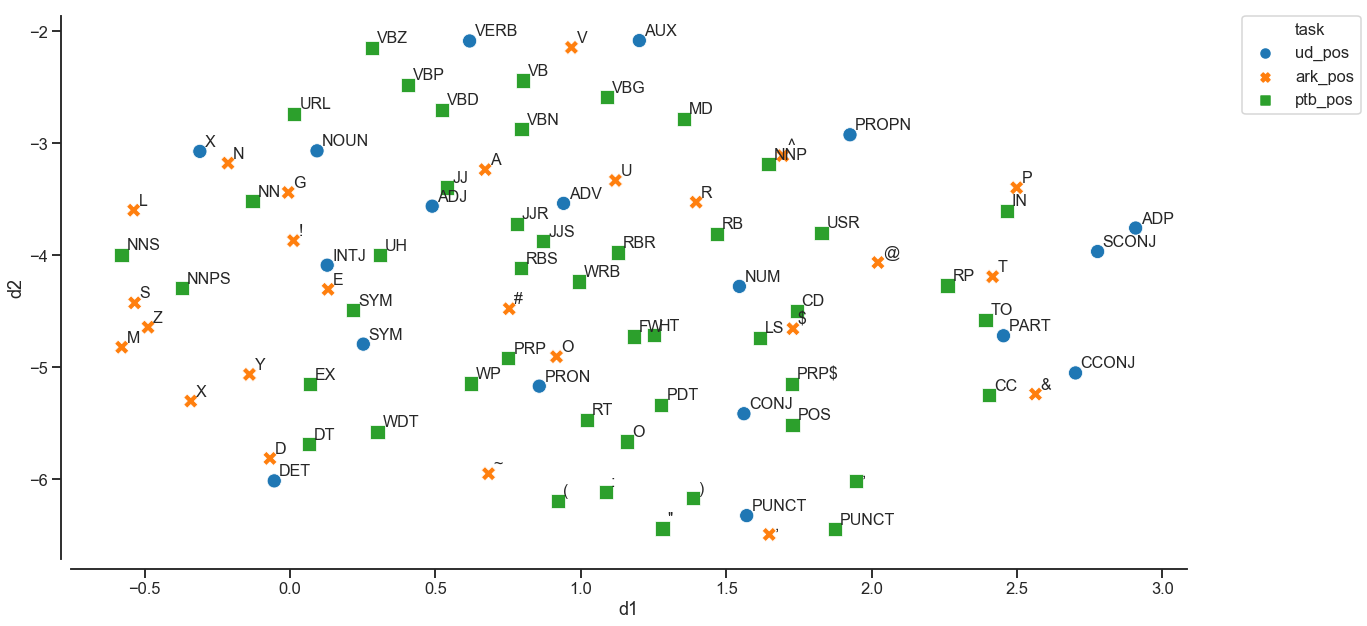

In [11]:
fig = plt.figure(figsize=(20, 10))

task = "pos"

df_t = df[df.task.str.endswith(task)].copy()
X_embedded = UMAP(
    n_components=2, 
    min_dist=0.1,
    n_neighbors=100
).fit_transform(all_weights[df_t.index.values, :])
df_t["d1"] = X_embedded[:, 0]
df_t["d2"] = X_embedded[:, 1]

ax = sns.scatterplot(
    x="d1", y="d2", 
    data=df_t, 
    hue="task", style="task", 
    s=200
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i, row in df_t.iterrows():
    #ax.text(row.d1+.1, row.d2+.1, row.label, fontsize=16)
    ax.annotate(
        row.label, 
        xy=(row.d1, row.d2), xytext=(5, 5), 
        textcoords='offset points',
        fontsize=16
    )
    
sns.despine(offset=10)
plt.savefig(f"../figures/multitask_learning/tagging_{MODEL_NAME}_{task}.pdf", bbox_inches="tight")

F:\ProgramData\Miniconda3\envs\SocialMediaIE\lib\site-packages\umap\umap_.py:1364: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


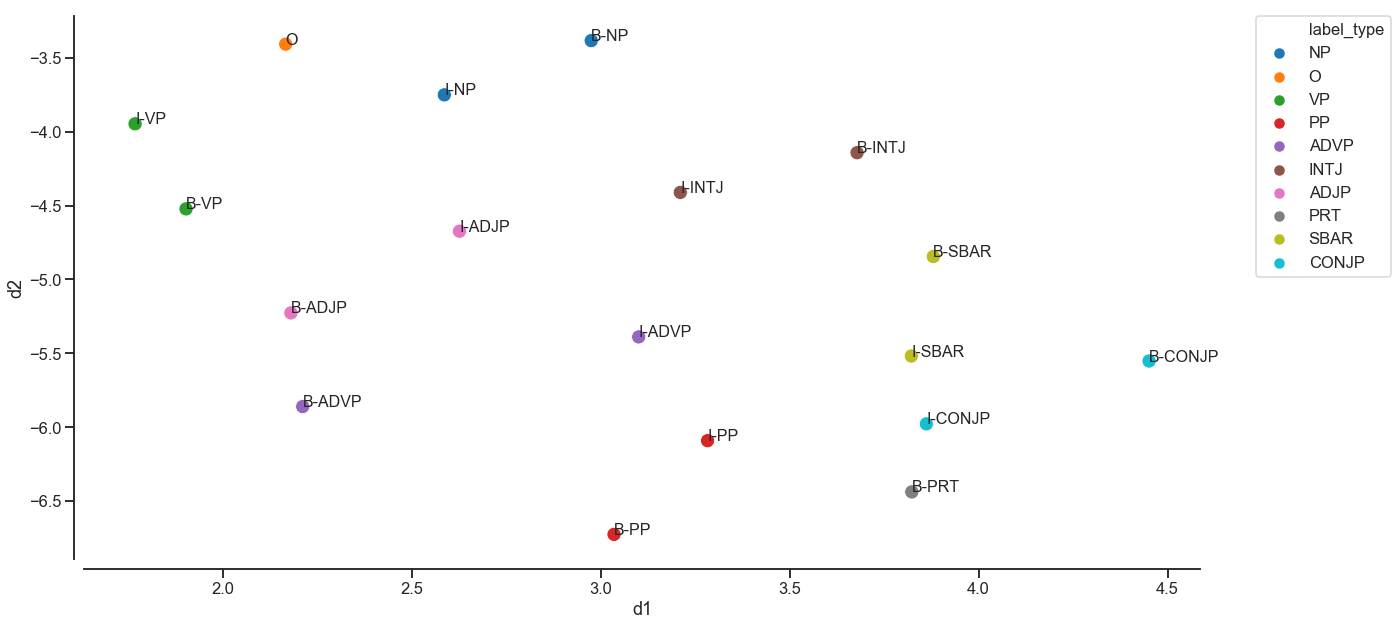

In [12]:
fig = plt.figure(figsize=(20, 10))

task = "chunk"

def get_chunk_label_type(label):
    if label == "O":
        return label
    label = label.split("-")[1]
    return label

df_t = df[df.task.str.endswith(task)].copy().assign(label_type=lambda x: x.label.apply(get_chunk_label_type))
X_embedded = UMAP(
    n_components=2, 
    n_neighbors=100
).fit_transform(all_weights[df_t.index.values, :])
df_t["d1"] = X_embedded[:, 0]
df_t["d2"] = X_embedded[:, 1]

ax = sns.scatterplot(
    x="d1", y="d2", 
    data=df_t, 
    hue="label_type", 
    s=200
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i, row in df_t.iterrows():
    #ax.text(row.d1+.1, row.d2+.1, row.label, fontsize=16)
    ax.annotate(
        row.label, 
        xy=(row.d1, row.d2), xytext=(0, 0), 
        textcoords='offset points',
        fontsize=16
    )
    
sns.despine(offset=10)
plt.savefig(f"../figures/multitask_learning/tagging_{MODEL_NAME}_{task}.pdf", bbox_inches="tight")

F:\ProgramData\Miniconda3\envs\SocialMediaIE\lib\site-packages\umap\umap_.py:1364: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


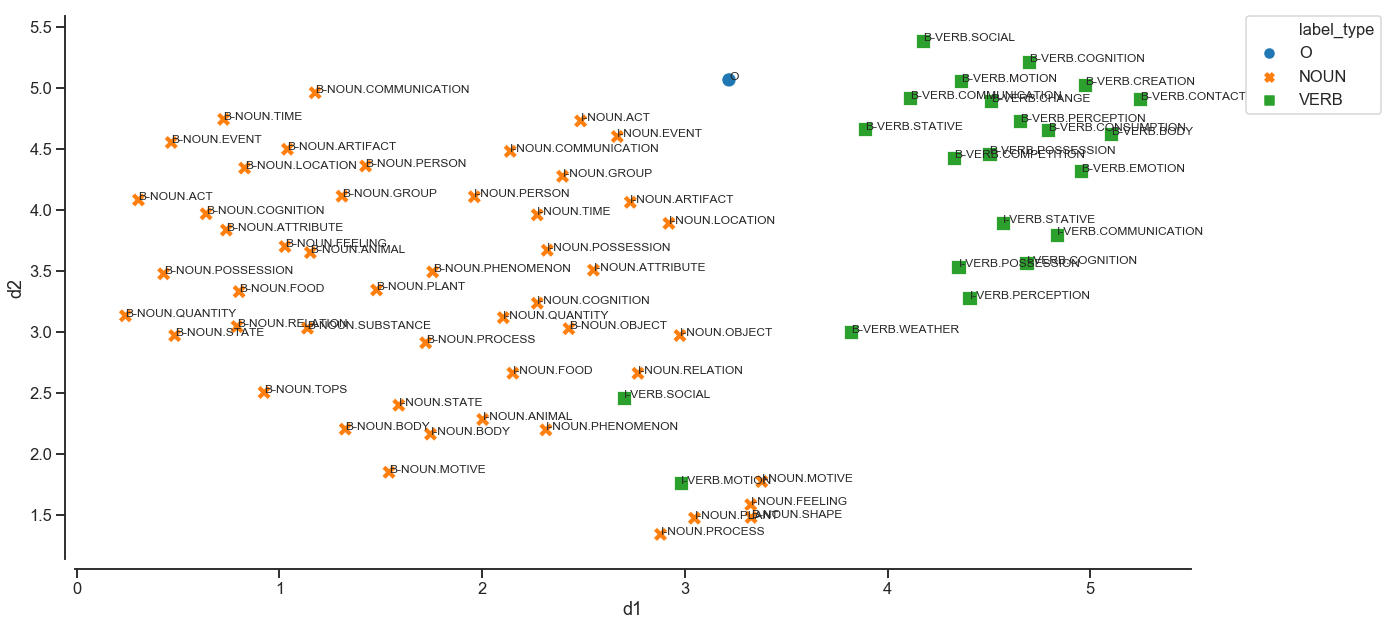

In [13]:
fig = plt.figure(figsize=(20, 10))

task = "ccg"

def get_ccg_label_type(label):
    if label == "O":
        return label
    label = label.split("-")[1]
    label = label.split(".")[0]
    return label
    
df_t = df[df.task.str.endswith(task)].copy().assign(label_type=lambda x: x.label.apply(get_ccg_label_type))
X_embedded = UMAP(
    n_components=2, 
    n_neighbors=100
).fit_transform(all_weights[df_t.index.values, :])
df_t["d1"] = X_embedded[:, 0]
df_t["d2"] = X_embedded[:, 1]
    
    
ax = sns.scatterplot(
    x="d1", y="d2", 
    data=df_t, 
    hue="label_type", style="label_type", 
    s=200
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for i, row in df_t.iterrows():
    #ax.text(row.d1+.1, row.d2+.1, row.label, fontsize=16)
    ax.annotate(
        row.label, 
        xy=(row.d1, row.d2), xytext=(0, 0), 
        textcoords='offset points',
        fontsize=12
    )
    
sns.despine(offset=10)
plt.savefig(f"../figures/multitask_learning/tagging_{MODEL_NAME}_{task}.pdf", bbox_inches="tight")